In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# Read the CSV file
df = pd.read_csv('menu.csv')

# Selecting only the required attributes
df1 = df[['Calories', 'Total Fat', 'Carbohydrates', 'Dietary Fiber', 'Sugars', 'Protein', 
         'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)', 'Calcium (% Daily Value)', 
         'Iron (% Daily Value)']]


In [2]:
#task1
df1

,Calories,Total Fat,Carbohydrates,Dietary Fiber,Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,300,13.0,31,4,3,17,10,0,25,15
1,250,8.0,30,4,3,18,6,0,25,8
2,370,23.0,29,4,2,14,8,0,25,10
3,450,28.0,30,4,2,21,15,0,30,15
4,400,23.0,30,4,2,21,6,0,25,10
...,...,...,...,...,...,...,...,...,...,...
255,510,17.0,80,1,64,12,15,0,40,8
256,690,23.0,106,1,85,15,20,0,50,10
257,340,11.0,53,1,43,8,10,0,25,6
258,810,32.0,114,2,103,21,20,0,60,6


In [3]:
#task2
stats = df1.describe()
print("Statistical facts for all columns:")
print(stats)

max_values = df[['Calories', 'Total Fat', 'Carbohydrates', 'Dietary Fiber', 'Sugars', 'Protein', 
                 'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)', 'Calcium (% Daily Value)', 
                 'Iron (% Daily Value)']].max()
print("\nMaximum values for specified attributes:")
print(max_values)


Statistical facts for all columns:
          Calories   Total Fat  Carbohydrates  Dietary Fiber      Sugars  \
count   260.000000  260.000000     260.000000     260.000000  260.000000   
mean    368.269231   14.165385      47.346154       1.630769   29.423077   
std     240.269886   14.205998      28.252232       1.567717   28.679797   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%     210.000000    2.375000      30.000000       0.000000    5.750000   
50%     340.000000   11.000000      44.000000       1.000000   17.500000   
75%     500.000000   22.250000      60.000000       3.000000   48.000000   
max    1880.000000  118.000000     141.000000       7.000000  128.000000   

          Protein  Vitamin A (% Daily Value)  Vitamin C (% Daily Value)  \
count  260.000000                 260.000000                 260.000000   
mean    13.338462                  13.426923                   8.534615   
std     11.426146                  24.366381           

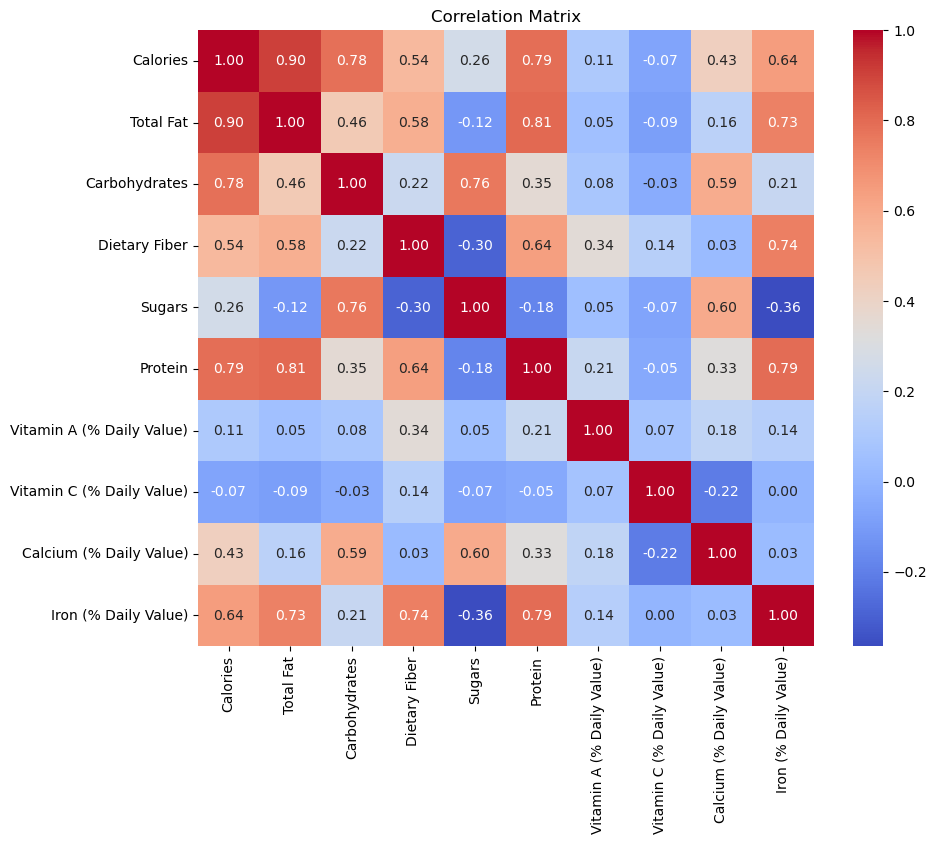

In [4]:
#task3
plt.figure(figsize=(10, 8))
correlation_matrix = df1.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix')
plt.show()


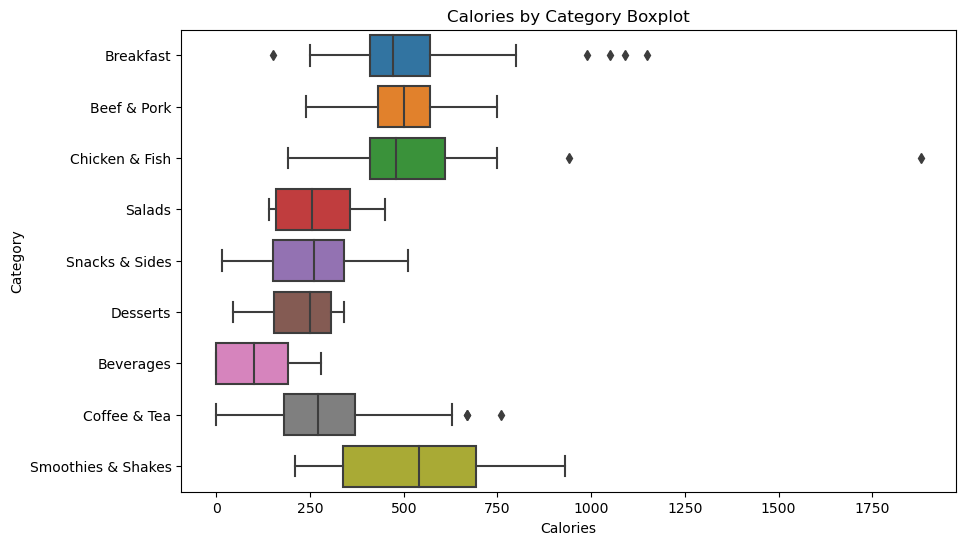

In [5]:
#task4
categories = df['Category'].unique()
plt.figure(figsize=(10, 6))
sns.boxplot(x='Calories', y='Category', data=df, order=categories)
plt.title('Calories by Category Boxplot')
plt.xlabel('Calories')
plt.ylabel('Category')
plt.show()

In [6]:
max_calories_by_category = df.groupby('Category')['Calories'].max()
max_calories_category = max_calories_by_category.idxmax()
max_calories = max_calories_by_category.max()

print("Category with the maximum calories:", max_calories_category)
print("Maximum calories in the category:", max_calories)

Category with the maximum calories: Chicken & Fish
Maximum calories in the category: 1880


C:\Program Files\KMSpico\temp\ipykernel_6004\1300639600.py:5: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='Category', y='Calories', data=df, order=categories, jitter=True,palette=category_colors)
C:\Program Files\KMSpico\temp\ipykernel_6004\1300639600.py:5: UserWarning: The palette list has more values (10) than needed (9), which may not be intended.
  sns.stripplot(x='Category', y='Calories', data=df, order=categories, jitter=True,palette=category_colors)


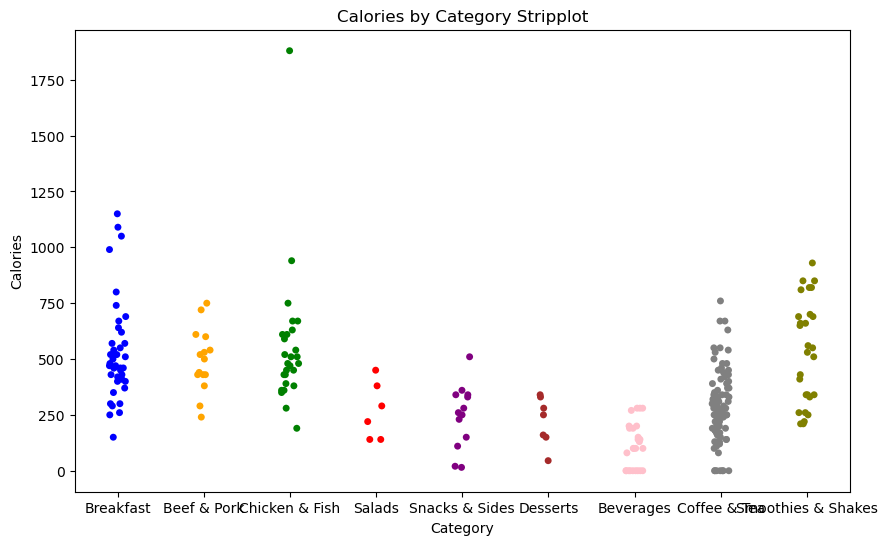

In [7]:
#task5
categories = df['Category'].unique()
category_colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
plt.figure(figsize=(10, 6))
sns.stripplot(x='Category', y='Calories', data=df, order=categories, jitter=True,palette=category_colors)
plt.title('Calories by Category Stripplot')
plt.ylabel('Calories')
plt.xlabel('Category')
plt.show()


In [8]:
#task6
top_items = {}

for component in df1:
    top_item_index = df[component].idxmax()
    top_item = df.loc[top_item_index, 'Item']
    top_items[component] = top_item
for component, item in top_items.items():
    print(f"{component}: {item}",max_calories)


Calories: Chicken McNuggets (40 piece) 1880
Total Fat: Chicken McNuggets (40 piece) 1880
Carbohydrates: Chocolate Shake (Large) 1880
Dietary Fiber: Big Breakfast with Hotcakes (Large Biscuit) 1880
Sugars: McFlurry with M&M’s Candies (Medium) 1880
Protein: Chicken McNuggets (40 piece) 1880
Vitamin A (% Daily Value): Premium Bacon Ranch Salad (without Chicken) 1880
Vitamin C (% Daily Value): Minute Maid Orange Juice (Large) 1880
Calcium (% Daily Value): Strawberry Shake (Large) 1880
Iron (% Daily Value): Big Breakfast with Hotcakes (Regular Biscuit) 1880


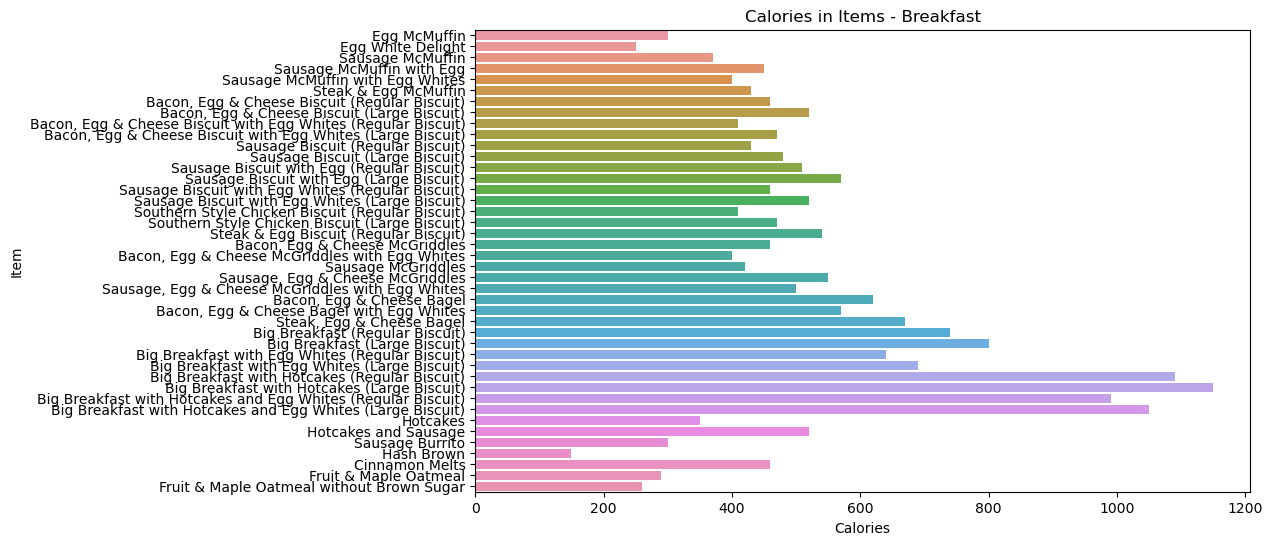

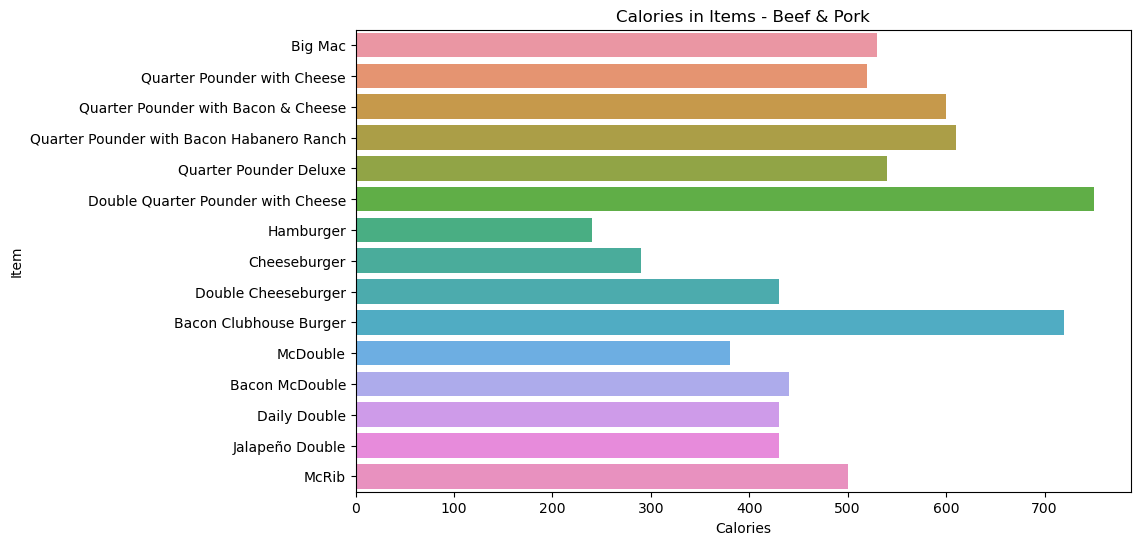

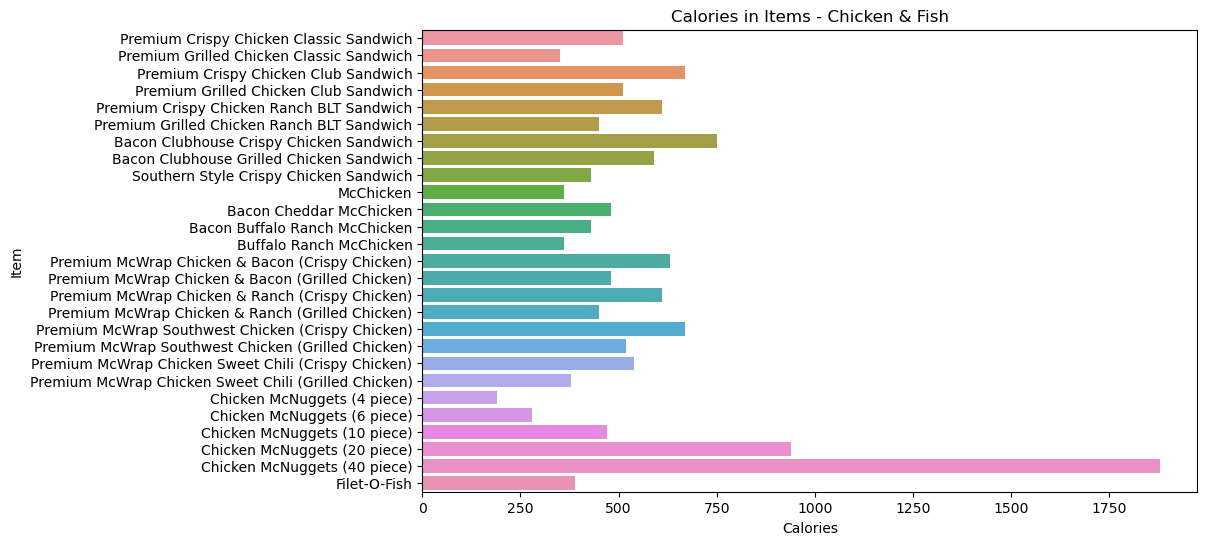

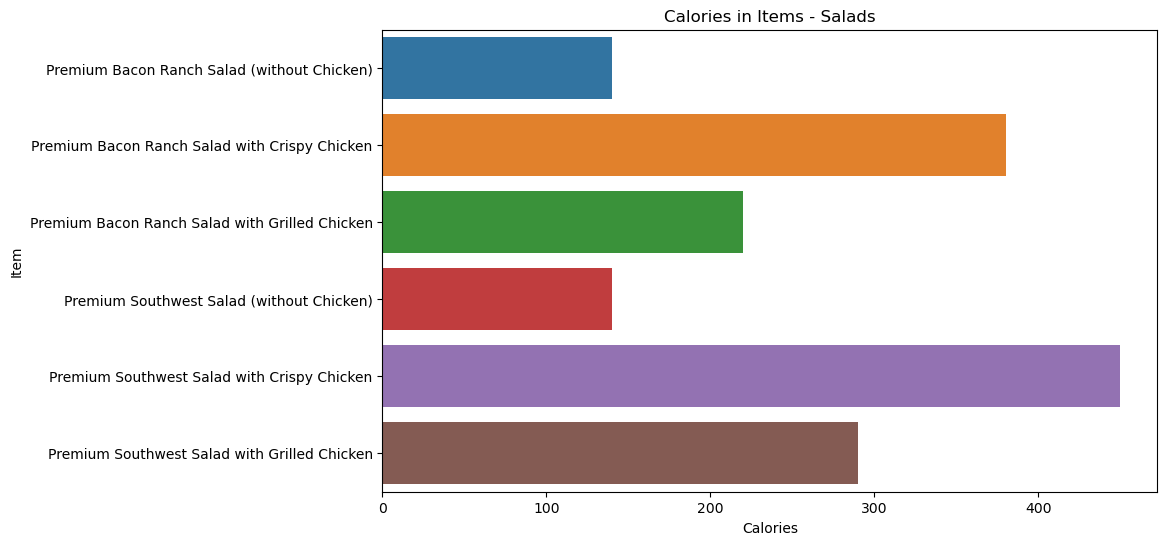

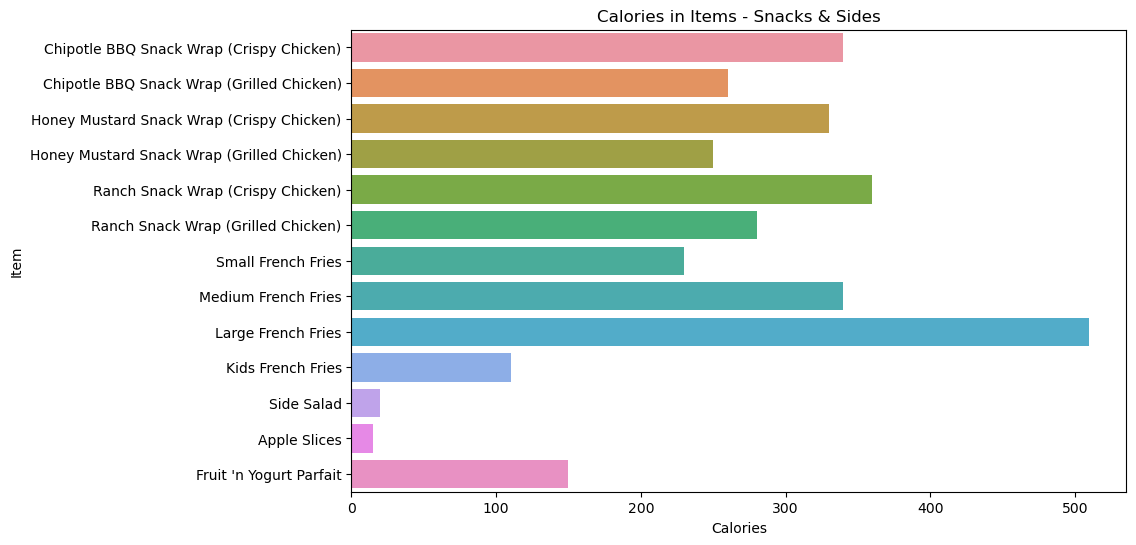

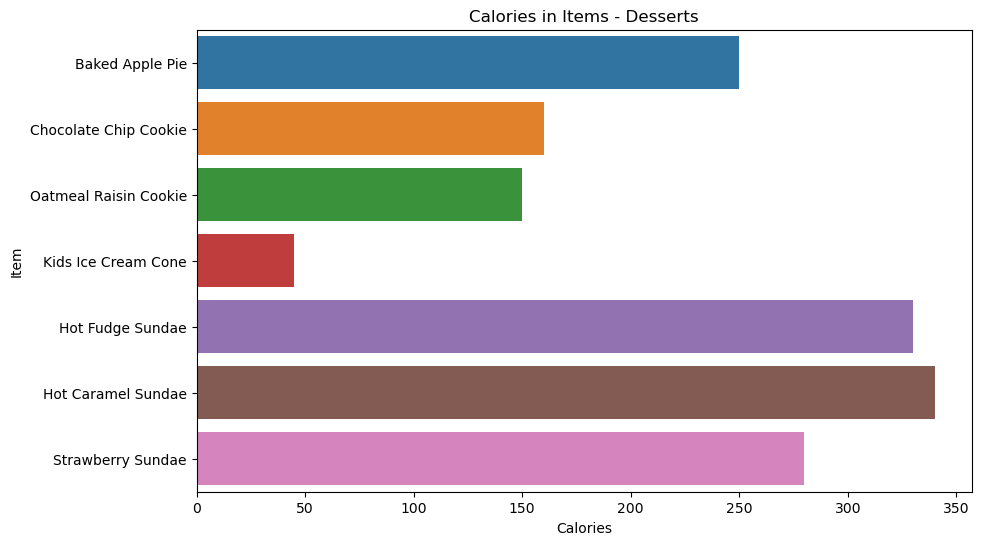

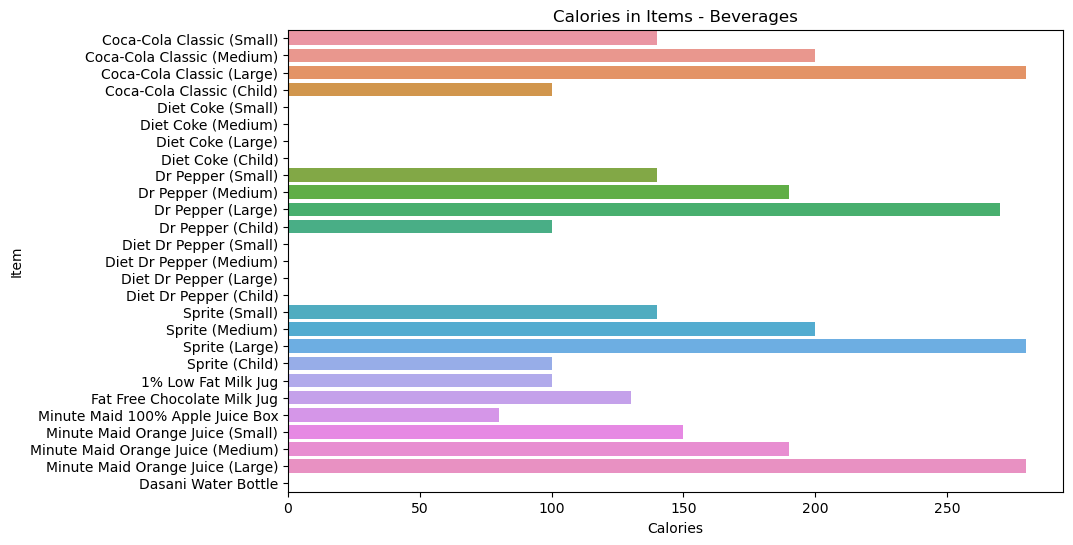

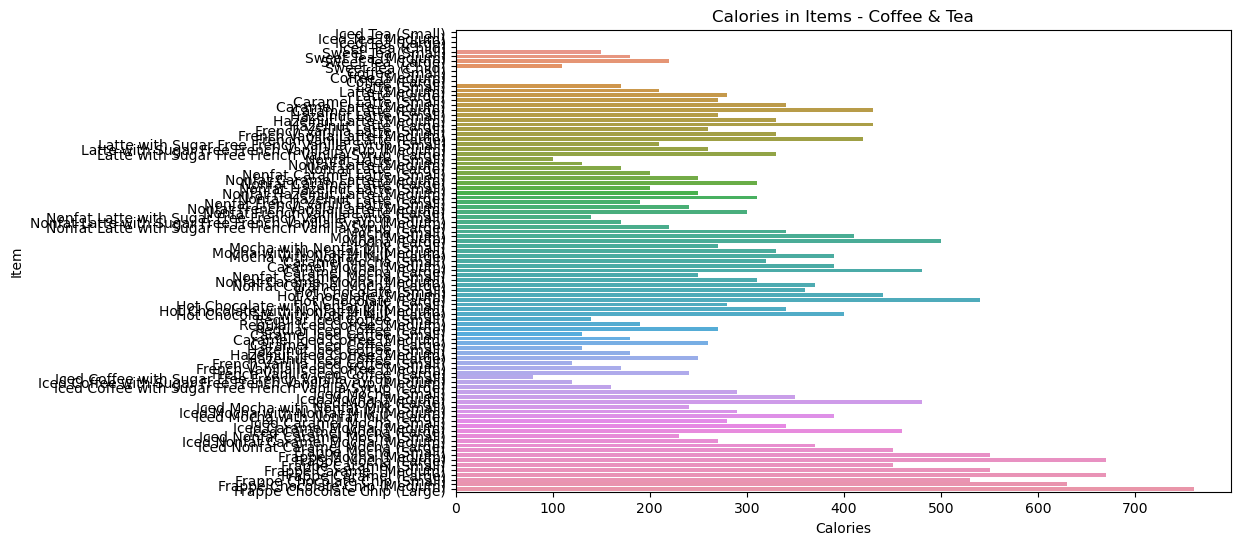

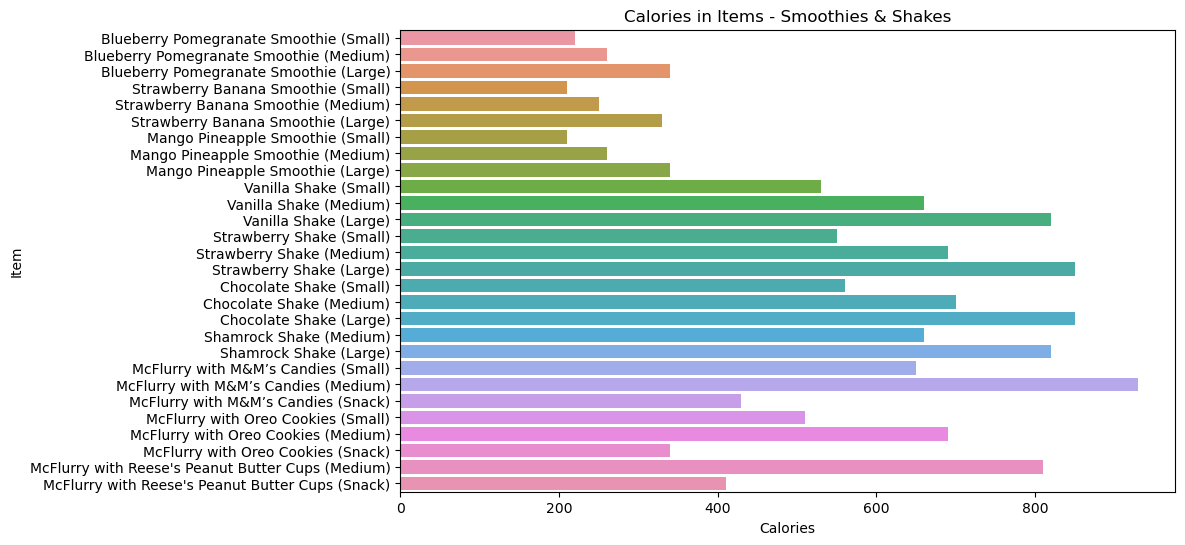

In [9]:
# Task7
for category in categories:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Calories', y='Item', data=df[df['Category'] == category])
    plt.title(f'Calories in Items - {category}')
    plt.xlabel('Calories')
    plt.ylabel('Item')
    plt.show()
